In [31]:
import pandas as pd
import glob
import pycountry
import numpy as np

In [118]:
df_to_check=pd.read_csv("../data/all_measures_v3_cleaned.csv",encoding='latin1')
df_to_check

,Unnamed: 0,Country Name,Land,Country Code,gdp_rel_ger,ppp_rel_ger,cost_to_gdp,popdensity,homicides,Country or Territory,...,Muslim_%,Irreligion_%,Hindu_%,Buddhist_%,Folk religion_%,Other religion_%,Jewish_%,ban,Code,LGBTQ
0,0,Burundi,Burundi,BDI,0.002759,0.209981,76.118642,533.078271,5.649742,Burundi,...,2.1,0.0,0.0,0.0,5.7,0.0,0.0,NaN,BDI,7.91
1,1,Central African Republic,Zentral Afrikanische Republik,CAF,0.009250,0.529283,57.217771,8.270604,20.120401,Central African Republic,...,15.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,CAF,27.03
2,2,"Yemen, Rep.",Jemen,YEM,0.011360,0.564557,49.697205,74.608025,5.809719,Yemen,...,99.1,0.1,0.6,0.0,0.0,0.0,0.0,1.0,YEM,2.86
3,3,"Somalia, Fed. Rep.",Somalia,SOM,0.011415,0.515590,45.166019,29.264219,NaN,Somalia,...,99.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SOM,1.00
4,4,South Sudan,Südsudan,SSD,0.019357,0.863409,44.603581,18.171908,13.982581,South Sudan,...,6.2,0.5,0.0,0.0,32.9,0.0,0.0,NaN,SSD,6.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,218,Northern Mariana Islands,Northern Mariana Islands,MNP,0.426266,NaN,NaN,98.136957,NaN,NaN,...,0.7,1.0,0.0,10.6,5.3,1.1,0.0,NaN,NaN,NaN
215,219,New Caledonia,New Caledonia,NCL,0.600649,NaN,NaN,15.857221,3.109821,NaN,...,2.8,10.4,0.0,0.6,0.2,0.8,0.0,NaN,NaN,NaN
216,220,"Korea, Dem. People's Rep.",Nordkorea,PRK,NaN,NaN,NaN,219.402076,NaN,North Korea,...,0.0,71.3,0.0,1.5,12.3,12.9,0.0,NaN,PRK,32.11
217,221,French Polynesia,French Polynesia,PYF,0.408137,NaN,NaN,80.990493,0.371083,NaN,...,0.1,4.8,0.0,0.0,0.5,0.4,0.0,NaN,NaN,NaN


In [119]:
df_to_check["FreedomScore"]=pd.to_numeric(df_to_check["FreedomScore"], errors='coerce')
df_to_check["LGBTQ"]=pd.to_numeric(df_to_check["LGBTQ"], errors='coerce')
df_to_check

,Unnamed: 0,Country Name,Land,Country Code,gdp_rel_ger,ppp_rel_ger,cost_to_gdp,popdensity,homicides,Country or Territory,...,Muslim_%,Irreligion_%,Hindu_%,Buddhist_%,Folk religion_%,Other religion_%,Jewish_%,ban,Code,LGBTQ
0,0,Burundi,Burundi,BDI,0.002759,0.209981,76.118642,533.078271,5.649742,Burundi,...,2.1,0.0,0.0,0.0,5.7,0.0,0.0,NaN,BDI,7.91
1,1,Central African Republic,Zentral Afrikanische Republik,CAF,0.009250,0.529283,57.217771,8.270604,20.120401,Central African Republic,...,15.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,CAF,27.03
2,2,"Yemen, Rep.",Jemen,YEM,0.011360,0.564557,49.697205,74.608025,5.809719,Yemen,...,99.1,0.1,0.6,0.0,0.0,0.0,0.0,1.0,YEM,2.86
3,3,"Somalia, Fed. Rep.",Somalia,SOM,0.011415,0.515590,45.166019,29.264219,NaN,Somalia,...,99.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SOM,1.00
4,4,South Sudan,Südsudan,SSD,0.019357,0.863409,44.603581,18.171908,13.982581,South Sudan,...,6.2,0.5,0.0,0.0,32.9,0.0,0.0,NaN,SSD,6.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,218,Northern Mariana Islands,Northern Mariana Islands,MNP,0.426266,NaN,NaN,98.136957,NaN,NaN,...,0.7,1.0,0.0,10.6,5.3,1.1,0.0,NaN,NaN,NaN
215,219,New Caledonia,New Caledonia,NCL,0.600649,NaN,NaN,15.857221,3.109821,NaN,...,2.8,10.4,0.0,0.6,0.2,0.8,0.0,NaN,NaN,NaN
216,220,"Korea, Dem. People's Rep.",Nordkorea,PRK,NaN,NaN,NaN,219.402076,NaN,North Korea,...,0.0,71.3,0.0,1.5,12.3,12.9,0.0,NaN,PRK,32.11
217,221,French Polynesia,French Polynesia,PYF,0.408137,NaN,NaN,80.990493,0.371083,NaN,...,0.1,4.8,0.0,0.0,0.5,0.4,0.0,NaN,NaN,NaN


In [120]:
df_to_check=df_to_check.sort_values(by=["FreedomScore"], ascending=[False])
df_to_check

,Unnamed: 0,Country Name,Land,Country Code,gdp_rel_ger,ppp_rel_ger,cost_to_gdp,popdensity,homicides,Country or Territory,...,Muslim_%,Irreligion_%,Hindu_%,Buddhist_%,Folk religion_%,Other religion_%,Jewish_%,ban,Code,LGBTQ
172,176,Finland,Finnland,FIN,0.953197,1.075284,1.128081,18.370545,0.981935,Finland,...,NaN,30.60,NaN,0.00,NaN,0.80,0.00,NaN,FIN,85.00
176,180,Sweden,Schweden,SWE,1.034462,1.052953,1.017875,25.871368,1.146757,Sweden,...,2.30,36.00,NaN,0.10,NaN,0.10,0.08,NaN,SWE,80.46
163,166,New Zealand,Neuseeland,NZL,0.873599,1.146438,1.312316,19.919487,1.461494,New Zealand,...,1.31,48.47,2.63,1.12,0.4,3.27,0.11,NaN,NZL,87.05
196,200,Norway,Norwegen,NOR,1.555724,1.113305,0.715619,15.152480,0.724747,Norway,...,3.41,20.17,NaN,0.40,NaN,5.21,0.01,NaN,NOR,86.82
173,177,Canada,Kanada,CAN,0.972803,1.074403,1.104441,4.560798,1.979689,Canada,...,4.90,34.60,2.30,1.00,0.2,2.70,0.90,NaN,CAN,95.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,216,St. Martin (French part),St. Martin (French part),MAF,0.388321,NaN,NaN,550.300000,26.899798,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,218,Northern Mariana Islands,Northern Mariana Islands,MNP,0.426266,NaN,NaN,98.136957,NaN,NaN,...,0.70,1.00,0.00,10.60,5.3,1.10,0.00,NaN,NaN,NaN
215,219,New Caledonia,New Caledonia,NCL,0.600649,NaN,NaN,15.857221,3.109821,NaN,...,2.80,10.40,0.00,0.60,0.2,0.80,0.00,NaN,NaN,NaN
217,221,French Polynesia,French Polynesia,PYF,0.408137,NaN,NaN,80.990493,0.371083,NaN,...,0.10,4.80,0.00,0.00,0.5,0.40,0.00,NaN,NaN,NaN


In [121]:
df_to_check.columns

Index(['Unnamed: 0', 'Country Name', 'Land', 'Country Code', 'gdp_rel_ger',
       'ppp_rel_ger', 'cost_to_gdp', 'popdensity', 'homicides',
       'Country or Territory', 'FreedomScore', 'PISA Score',
       'timediff_to_germany', 'Cuisine Rank', 'SunshineHours_per_year',
       'sqm/sqkm', 'max_m', 'min_m', 'English Proficiency', 'ISO3',
       'Anzahl_der_Deutschen_numeric', 'Bureaucracy Score', 'MaxTemperature',
       'MinTemperature', 'LivingConditions', 'Healthcare', 'CostofLiving',
       'Country', 'Christian_%', 'Muslim_%', 'Irreligion_%', 'Hindu_%',
       'Buddhist_%', 'Folk religion_%', 'Other religion_%', 'Jewish_%', 'ban',
       'Code', 'LGBTQ'],
      dtype='object')

In [122]:
df_to_check=df_to_check[['Country Name','Country Code',"Land",
             'gdp_rel_ger','ppp_rel_ger', 'cost_to_gdp', 'popdensity', 'homicides',
      'FreedomScore', 'PISA Score','timediff_to_germany', 'Cuisine Rank', 
      'SunshineHours_per_year', 'sqm/sqkm', 'max_m', 'min_m', 'English Proficiency', 
       'Anzahl_der_Deutschen_numeric', 'Bureaucracy Score', 'MaxTemperature',
       'MinTemperature', 'LivingConditions', 'Healthcare', 'CostofLiving', 
       'Christian_%', 'Muslim_%', 'Irreligion_%', 'Hindu_%', 'Buddhist_%',
       'Folk religion_%', 'Other religion_%', 'Jewish_%', 'ban',
       'LGBTQ']]

In [124]:
len(df_to_check.columns)

34

In [125]:
df_to_check[['Christian_%', 'Muslim_%', 'Irreligion_%', 'Hindu_%', 'Buddhist_%',
       'Folk religion_%', 'Other religion_%', 'Jewish_%', 'ban']]=df_to_check[['Christian_%', 'Muslim_%', 'Irreligion_%', 'Hindu_%', 'Buddhist_%',
       'Folk religion_%', 'Other religion_%', 'Jewish_%', 'ban']].fillna(0)
df_to_check


/var/folders/d_/6z_vk0mx7j10g1h2zrjh_6f00000gn/T/ipykernel_93901/1271743976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_check[['Christian_%', 'Muslim_%', 'Irreligion_%', 'Hindu_%', 'Buddhist_%',


,Country Name,Country Code,Land,gdp_rel_ger,ppp_rel_ger,cost_to_gdp,popdensity,homicides,FreedomScore,PISA Score,...,Christian_%,Muslim_%,Irreligion_%,Hindu_%,Buddhist_%,Folk religion_%,Other religion_%,Jewish_%,ban,LGBTQ
172,Finland,FIN,Finnland,0.953197,1.075284,1.128081,18.370545,0.981935,100.0,495.0,...,68.60,0.00,30.60,0.00,0.00,0.0,0.80,0.00,0.0,85.00
176,Sweden,SWE,Schweden,1.034462,1.052953,1.017875,25.871368,1.146757,99.0,488.0,...,61.30,2.30,36.00,0.00,0.10,0.0,0.10,0.08,0.0,80.46
163,New Zealand,NZL,Neuseeland,0.873599,1.146438,1.312316,19.919487,1.461494,99.0,495.0,...,37.00,1.31,48.47,2.63,1.12,0.4,3.27,0.11,0.0,87.05
196,Norway,NOR,Norwegen,1.555724,1.113305,0.715619,15.152480,0.724747,99.0,474.0,...,75.63,3.41,20.17,0.00,0.40,0.0,5.21,0.01,0.0,86.82
173,Canada,CAN,Kanada,0.972803,1.074403,1.104441,4.560798,1.979689,97.0,506.0,...,53.30,4.90,34.60,2.30,1.00,0.2,2.70,0.90,0.0,95.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,St. Martin (French part),MAF,St. Martin (French part),0.388321,NaN,NaN,550.300000,26.899798,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,NaN
214,Northern Mariana Islands,MNP,Northern Mariana Islands,0.426266,NaN,NaN,98.136957,NaN,NaN,NaN,...,81.30,0.70,1.00,0.00,10.60,5.3,1.10,0.00,0.0,NaN
215,New Caledonia,NCL,New Caledonia,0.600649,NaN,NaN,15.857221,3.109821,NaN,NaN,...,85.20,2.80,10.40,0.00,0.60,0.2,0.80,0.00,0.0,NaN
217,French Polynesia,PYF,French Polynesia,0.408137,NaN,NaN,80.990493,0.371083,NaN,NaN,...,94.00,0.10,4.80,0.00,0.00,0.5,0.40,0.00,0.0,NaN


,Country Name,Country Code,Land,gdp_rel_ger,ppp_rel_ger,cost_to_gdp,popdensity,homicides,FreedomScore,PISA Score,...,Christian_%,Muslim_%,Irreligion_%,Hindu_%,Buddhist_%,Folk religion_%,Other religion_%,Jewish_%,ban,LGBTQ
172,Finland,FIN,Finnland,0.953197,1.075284,1.128081,18.370545,0.981935,100.0,495.0,...,68.60,0.00,30.60,0.00,0.00,0.0,0.80,0.00,0.0,85.00
176,Sweden,SWE,Schweden,1.034462,1.052953,1.017875,25.871368,1.146757,99.0,488.0,...,61.30,2.30,36.00,0.00,0.10,0.0,0.10,0.08,0.0,80.46
163,New Zealand,NZL,Neuseeland,0.873599,1.146438,1.312316,19.919487,1.461494,99.0,495.0,...,37.00,1.31,48.47,2.63,1.12,0.4,3.27,0.11,0.0,87.05
196,Norway,NOR,Norwegen,1.555724,1.113305,0.715619,15.152480,0.724747,99.0,474.0,...,75.63,3.41,20.17,0.00,0.40,0.0,5.21,0.01,0.0,86.82
173,Canada,CAN,Kanada,0.972803,1.074403,1.104441,4.560798,1.979689,97.0,506.0,...,53.30,4.90,34.60,2.30,1.00,0.2,2.70,0.90,0.0,95.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Belarus,BLR,Belarus,0.149043,0.326477,2.190487,45.217077,2.384632,7.0,NaN,...,71.20,0.20,28.60,0.00,0.00,0.0,0.00,0.00,0.0,37.73
13,Afghanistan,AFG,Afghanistan,0.007415,0.243493,32.837974,63.558501,4.032458,6.0,NaN,...,0.01,99.70,0.00,0.00,0.00,0.0,0.06,0.00,1.0,0.51
37,Syrian Arab Republic,SYR,Syrien,0.015186,0.236112,15.548189,128.490023,2.059387,5.0,NaN,...,10.00,92.80,2.00,0.00,0.00,0.0,0.00,0.00,0.0,10.24
41,Tajikistan,TJK,Tadschikistan,0.024036,0.321457,13.374100,74.859853,0.892371,5.0,NaN,...,1.60,96.70,1.50,0.01,0.00,0.0,0.00,0.00,0.0,35.12


In [130]:
reisewarnungen_full=pd.read_csv("../data/reisewarnungen_full.csv")
reisewarnungen_full_list=reisewarnungen_full["0"].tolist()
reisewarnungen_full_list

['Afghanistan',
 'Belarus',
 'Haiti',
 'Iran',
 'Jemen',
 'Libyen',
 'Mali',
 'Myanmar',
 'Niger',
 'Palästinensische Gebiete',
 'Somalia',
 'Sudan',
 'Südsudan',
 'Syrien',
 'Ukraine',
 'Zentralafrikanische Republik']

In [136]:
safe_countries=df_to_check[~df_to_check["Land"].isin(reisewarnungen_full_list)]
safe_countries

,Country Name,Country Code,Land,gdp_rel_ger,ppp_rel_ger,cost_to_gdp,popdensity,homicides,FreedomScore,PISA Score,...,Christian_%,Muslim_%,Irreligion_%,Hindu_%,Buddhist_%,Folk religion_%,Other religion_%,Jewish_%,ban,LGBTQ
172,Finland,FIN,Finnland,0.953197,1.075284,1.128081,18.370545,0.981935,100.0,495.0,...,68.60,0.00,30.60,0.00,0.00,0.0,0.80,0.00,0.0,85.00
176,Sweden,SWE,Schweden,1.034462,1.052953,1.017875,25.871368,1.146757,99.0,488.0,...,61.30,2.30,36.00,0.00,0.10,0.0,0.10,0.08,0.0,80.46
163,New Zealand,NZL,Neuseeland,0.873599,1.146438,1.312316,19.919487,1.461494,99.0,495.0,...,37.00,1.31,48.47,2.63,1.12,0.4,3.27,0.11,0.0,87.05
196,Norway,NOR,Norwegen,1.555724,1.113305,0.715619,15.152480,0.724747,99.0,474.0,...,75.63,3.41,20.17,0.00,0.40,0.0,5.21,0.01,0.0,86.82
173,Canada,CAN,Kanada,0.972803,1.074403,1.104441,4.560798,1.979689,97.0,506.0,...,53.30,4.90,34.60,2.30,1.00,0.2,2.70,0.90,0.0,95.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,St. Martin (French part),MAF,St. Martin (French part),0.388321,NaN,NaN,550.300000,26.899798,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,NaN
214,Northern Mariana Islands,MNP,Northern Mariana Islands,0.426266,NaN,NaN,98.136957,NaN,NaN,NaN,...,81.30,0.70,1.00,0.00,10.60,5.3,1.10,0.00,0.0,NaN
215,New Caledonia,NCL,New Caledonia,0.600649,NaN,NaN,15.857221,3.109821,NaN,NaN,...,85.20,2.80,10.40,0.00,0.60,0.2,0.80,0.00,0.0,NaN
217,French Polynesia,PYF,French Polynesia,0.408137,NaN,NaN,80.990493,0.371083,NaN,NaN,...,94.00,0.10,4.80,0.00,0.00,0.5,0.40,0.00,0.0,NaN


In [137]:
safe_countries_enough_data=safe_countries.dropna(thresh=31)
safe_countries_enough_data

,Country Name,Country Code,Land,gdp_rel_ger,ppp_rel_ger,cost_to_gdp,popdensity,homicides,FreedomScore,PISA Score,...,Christian_%,Muslim_%,Irreligion_%,Hindu_%,Buddhist_%,Folk religion_%,Other religion_%,Jewish_%,ban,LGBTQ
172,Finland,FIN,Finnland,0.953197,1.075284,1.128081,18.370545,0.981935,100.0,495.0,...,68.60,0.00,30.60,0.00,0.00,0.0,0.80,0.00,0.0,85.00
176,Sweden,SWE,Schweden,1.034462,1.052953,1.017875,25.871368,1.146757,99.0,488.0,...,61.30,2.30,36.00,0.00,0.10,0.0,0.10,0.08,0.0,80.46
163,New Zealand,NZL,Neuseeland,0.873599,1.146438,1.312316,19.919487,1.461494,99.0,495.0,...,37.00,1.31,48.47,2.63,1.12,0.4,3.27,0.11,0.0,87.05
196,Norway,NOR,Norwegen,1.555724,1.113305,0.715619,15.152480,0.724747,99.0,474.0,...,75.63,3.41,20.17,0.00,0.40,0.0,5.21,0.01,0.0,86.82
173,Canada,CAN,Kanada,0.972803,1.074403,1.104441,4.560798,1.979689,97.0,506.0,...,53.30,4.90,34.60,2.30,1.00,0.2,2.70,0.90,0.0,95.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Cuba,CUB,Kuba,0.172137,NaN,NaN,106.165039,4.463151,10.0,NaN,...,59.20,0.00,23.00,0.20,0.00,17.4,0.00,0.00,0.0,80.91
178,Saudi Arabia,SAU,Saudi Arabia,0.628263,0.637582,1.014832,15.677949,0.935260,9.0,387.0,...,4.40,93.00,0.70,1.10,0.30,0.3,0.30,0.00,1.0,2.93
120,China,CHN,Volksrepublik China,0.238407,0.635931,2.667422,150.264001,0.501856,9.0,NaN,...,5.10,1.80,52.20,0.01,18.20,21.9,0.70,0.01,0.0,42.38
115,Azerbaijan,AZE,Aserbaidschan,0.130534,0.376167,2.881752,122.854906,2.161228,7.0,381.0,...,3.00,96.90,0.00,0.00,0.00,0.0,0.00,0.00,0.0,29.76


In [ ]:
percentile_upper=90
percentile_lower=10
for col in safe_countries_enough_data.columns[3:]:
    print(col)
    safe_countries_enough_data[col]

    # Get the 90th percentile value (upper 10%)
    threshold_upper = safe_countries_enough_data[col].quantile(percentile_upper*0.01)

    # Filter rows where column values are >= 90th percentile
    upper_10_percent = safe_countries_enough_data[safe_countries_enough_data[col] >= threshold_upper]

    # Get the 90th percentile value (upper 10%)
    threshold_lower = safe_countries_enough_data[col].quantile(percentile_lower*0.01)

    # Filter rows where column values are >= 90th percentile
    lower_10_percent = safe_countries_enough_data[safe_countries_enough_data[col] <= threshold_lower]

    middle_df=safe_countries_enough_data[safe_countries_enough_data[col] > threshold_lower]
    middle_df=middle_df[middle_df[col] < threshold_upper]
    middle_df

gdp_rel_ger
ppp_rel_ger
cost_to_gdp
popdensity
homicides
FreedomScore
PISA Score
timediff_to_germany
Cuisine Rank
SunshineHours_per_year
sqm/sqkm
max_m
min_m
English Proficiency
Anzahl_der_Deutschen_numeric
Bureaucracy Score
MaxTemperature
MinTemperature
LivingConditions
Healthcare
CostofLiving
Christian_%
Muslim_%
Irreligion_%
Hindu_%
Buddhist_%
Folk religion_%
Other religion_%
Jewish_%
ban
LGBTQ


In [149]:
def skew_trimmer(col):

    safe_countries_enough_data[col]

    # Get the 90th percentile value (upper 10%)
    threshold_upper = safe_countries_enough_data[col].quantile(percentile_upper*0.01)

    # Filter rows where column values are >= 90th percentile
    upper_10_percent = safe_countries_enough_data[safe_countries_enough_data[col] >= threshold_upper]

    # Get the 90th percentile value (upper 10%)
    threshold_lower = safe_countries_enough_data[col].quantile(percentile_lower*0.01)

    # Filter rows where column values are >= 90th percentile
    lower_10_percent = safe_countries_enough_data[safe_countries_enough_data[col] <= threshold_lower]

    middle_df=safe_countries_enough_data[safe_countries_enough_data[col] > threshold_lower]
    middle_df=middle_df[middle_df[col] < threshold_upper]
    return(middle_df)

In [148]:
middle_df

,Country Name,Country Code,Land,gdp_rel_ger,ppp_rel_ger,cost_to_gdp,popdensity,homicides,FreedomScore,PISA Score,...,Christian_%,Muslim_%,Irreligion_%,Hindu_%,Buddhist_%,Folk religion_%,Other religion_%,Jewish_%,ban,LGBTQ
172,Finland,FIN,Finnland,0.953197,1.075284,1.128081,18.370545,0.981935,100.0,495.0,...,68.60,0.00,30.60,0.00,0.00,0.0,0.80,0.00,0.0,85.00
176,Sweden,SWE,Schweden,1.034462,1.052953,1.017875,25.871368,1.146757,99.0,488.0,...,61.30,2.30,36.00,0.00,0.10,0.0,0.10,0.08,0.0,80.46
163,New Zealand,NZL,Neuseeland,0.873599,1.146438,1.312316,19.919487,1.461494,99.0,495.0,...,37.00,1.31,48.47,2.63,1.12,0.4,3.27,0.11,0.0,87.05
196,Norway,NOR,Norwegen,1.555724,1.113305,0.715619,15.152480,0.724747,99.0,474.0,...,75.63,3.41,20.17,0.00,0.40,0.0,5.21,0.01,0.0,86.82
202,Luxembourg,LUX,Luxemburg,2.464445,1.181780,0.479532,258.862053,1.530661,97.0,NaN,...,70.40,2.30,26.80,0.00,0.00,0.0,0.30,0.10,0.0,80.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Russian Federation,RUS,Russland,0.266827,0.406954,1.525159,8.782272,6.765125,12.0,NaN,...,73.30,10.00,16.20,0.00,0.10,0.2,0.00,0.20,0.0,31.55
206,Cuba,CUB,Kuba,0.172137,NaN,NaN,106.165039,4.463151,10.0,NaN,...,59.20,0.00,23.00,0.20,0.00,17.4,0.00,0.00,0.0,80.91
120,China,CHN,Volksrepublik China,0.238407,0.635931,2.667422,150.264001,0.501856,9.0,NaN,...,5.10,1.80,52.20,0.01,18.20,21.9,0.70,0.01,0.0,42.38
115,Azerbaijan,AZE,Aserbaidschan,0.130534,0.376167,2.881752,122.854906,2.161228,7.0,381.0,...,3.00,96.90,0.00,0.00,0.00,0.0,0.00,0.00,0.0,29.76


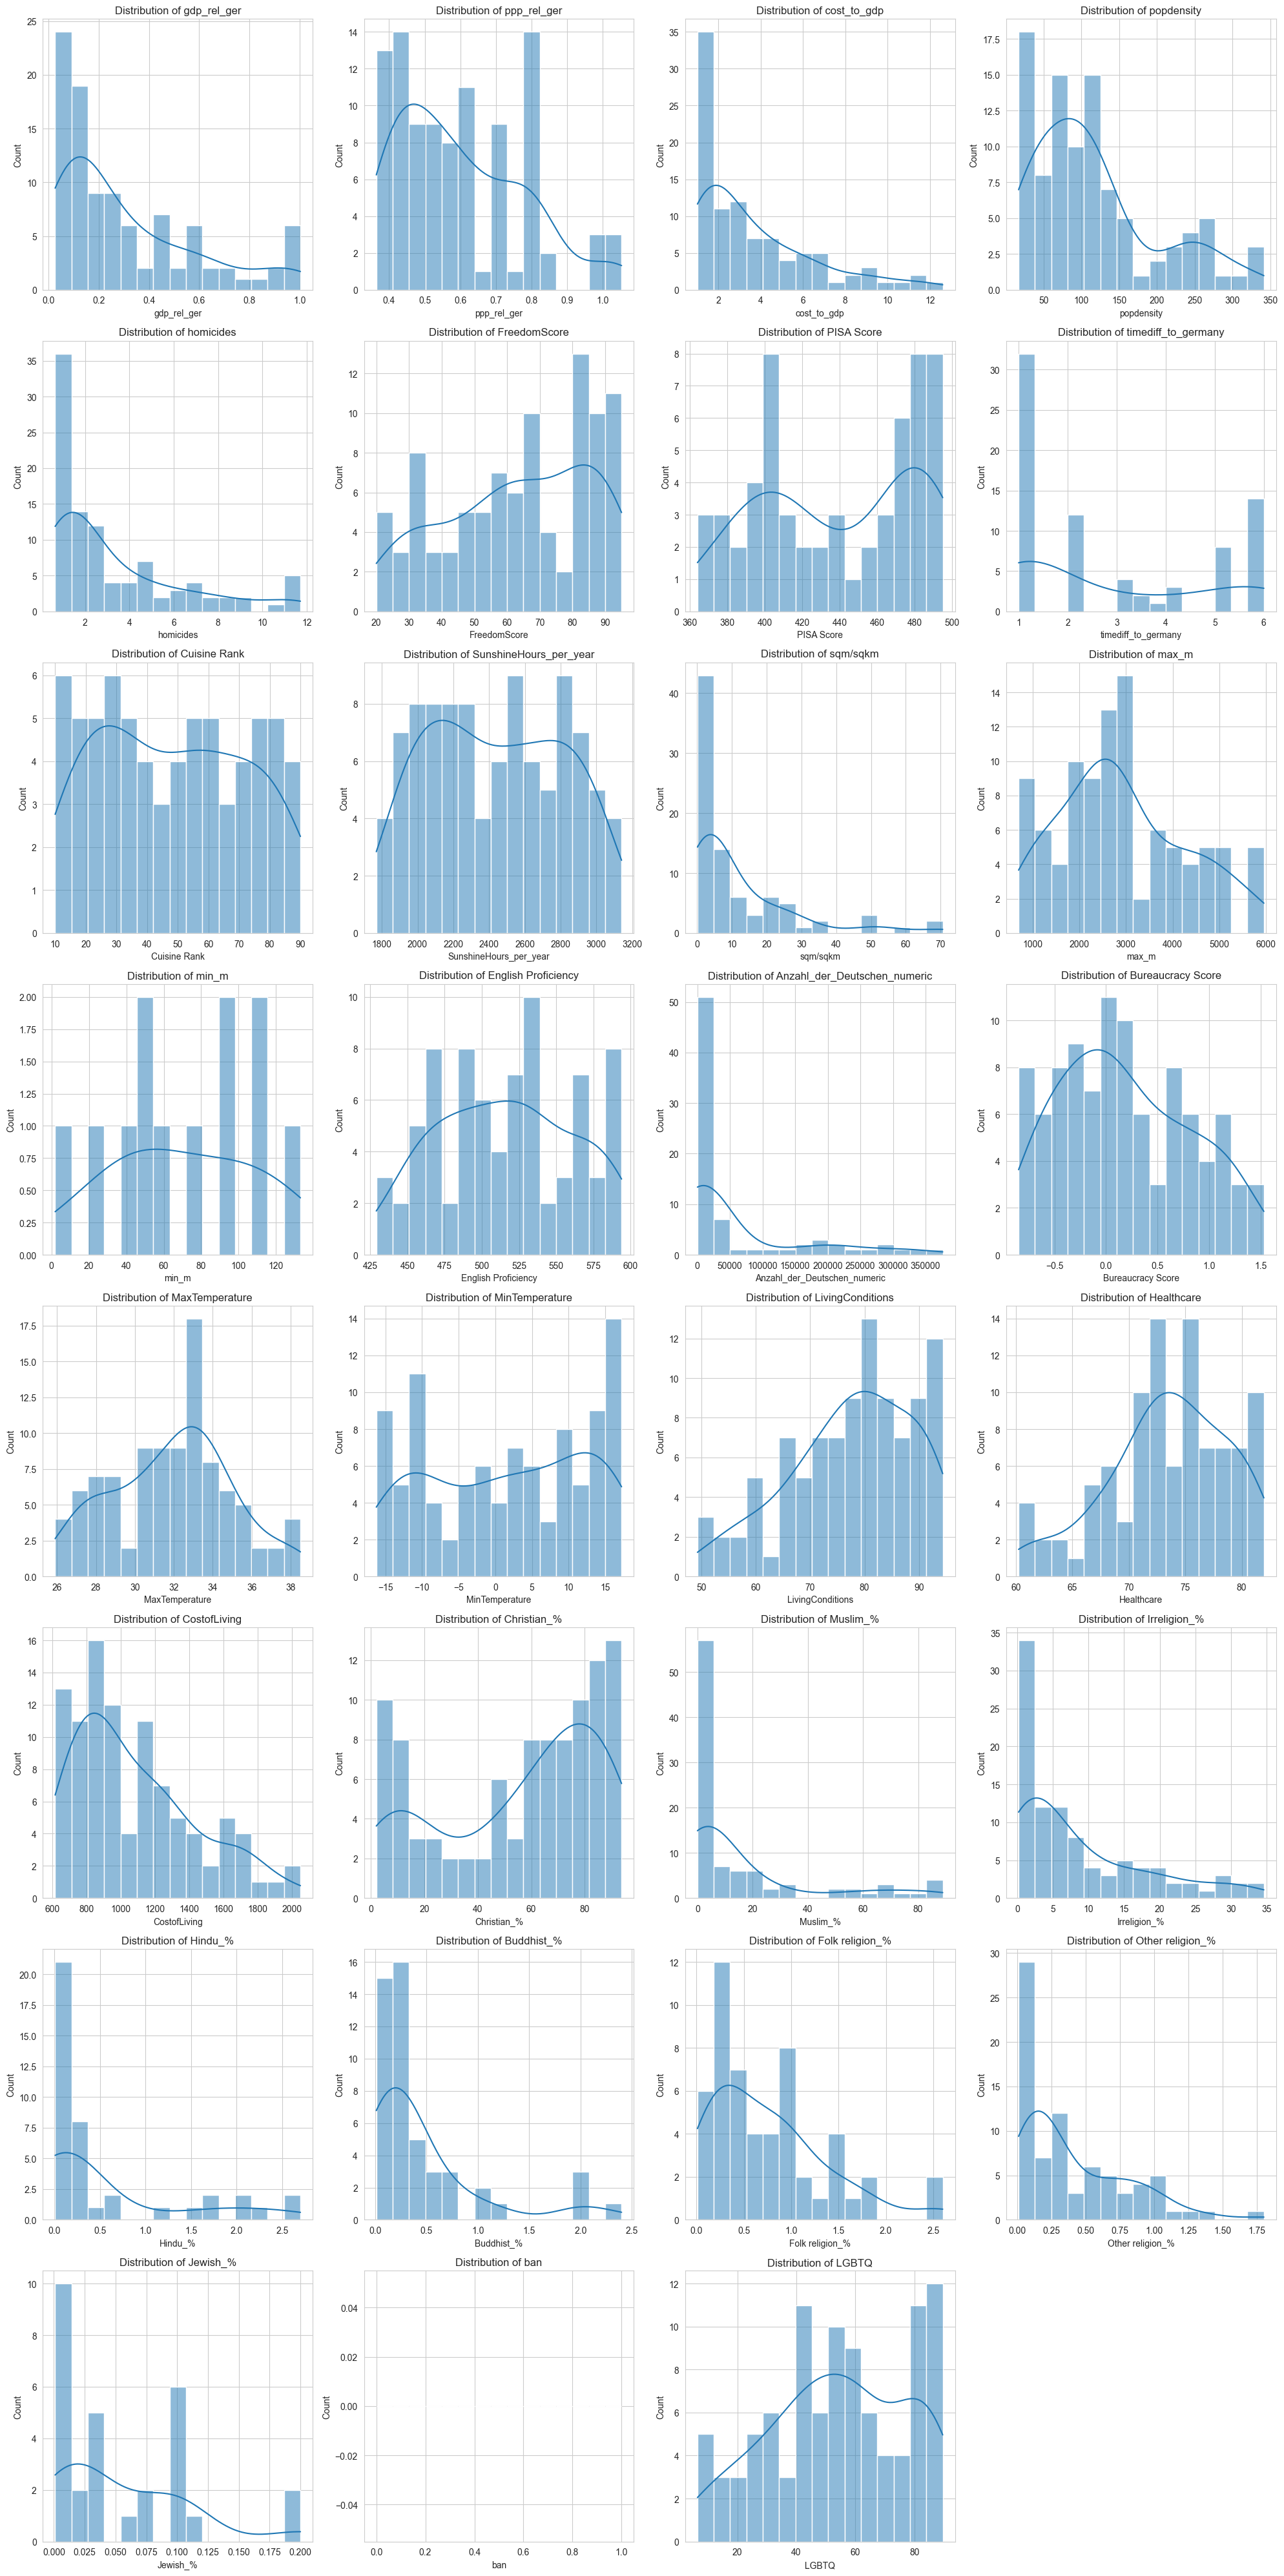

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Get numeric columns
numeric_cols = safe_countries_enough_data.select_dtypes(include=[np.number]).columns

# Create subplots
n_cols = 4
n_rows = len(numeric_cols) // n_cols + (1 if len(numeric_cols) % n_cols > 0 else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for i, col in enumerate(numeric_cols):
    df_to_plot=skew_trimmer(col)
    sns.histplot(data=df_to_plot, x=col, ax=axes[i], kde=True, bins=15)
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()